In [1]:
## Importing libraries
from tqdm.notebook import tqdm as tqdm_notebook
import seaborn as sns
import sys 
from scipy.io import loadmat
import pickle as pk
import os
from itertools import combinations
from matplotlib.lines import Line2D
from utils_neuromaps_brain import *
import pickle as pk
N_nodes=119
N_subjects=100

In [2]:
### Loading all the triangle data in a dictionary (heavy on RAM):
list_subjs=['100307', '100408', '101107', '101309', '101915', '103111', '103414', '103818', '105014', '105115', '106016', '108828', '110411', '111312', '111716', '113619', '113922', '114419', '115320', '116524', '117122', '118528', '118730', '118932', '120111', '122317', '122620', '123117', '123925', '124422', '125525', '126325', '127630', '127933', '128127', '128632', '129028', '130013', '130316', '131217', '131722', '133019', '133928', '135225', '135932', '136833', '138534', '139637', '140925', '144832', '146432', '147737', '148335', '148840', '149337', '149539', '149741', '151223', '151526', '151627', '153025', '154734', '156637', '159340', '160123', '161731', '162733', '163129', '176542', '178950', '188347', '189450', '190031', '192540', '196750', '198451', '199655', '201111', '208226', '211417', '211720', '212318', '214423', '221319', '239944', '245333', '280739', '298051', '366446', '397760', '414229', '499566', '654754', '672756', '751348', '756055', '792564', '856766', '857263', '899885']

if os.path.isfile('data_triangles_REST.pkl'):
    data_triangles_REST = {}
    with open('data_triangles_REST.pkl','rb+') as f:
        data_triangles_REST = pk.load(f)

In [3]:
### Loading data from the bootstrapped runs
with open('results_all_fingerprinting_bootstrap_triangles_100bootstrap_80subj.pkl','rb+') as f:
    results_all_fingerprinting_bootstrap_triangles=pk.load(f)
with open('results_all_fingerprinting_bootstrap_eFC_100bootstrap_80subj.pkl','rb+') as f:
    results_all_fingerprinting_bootstrap_eFC=pk.load(f)
with open('results_all_fingerprinting_bootstrap_FC_100bootstrap_80subj.pkl','rb+') as f:
    results_all_fingerprinting_bootstrap_FC=pk.load(f)

In [4]:
def plot_adjustments(ax=False, ticks_width=1.5, axis_width=2.5, labelsizereg=16,disable_top_right=False):
    if ax == False:
        ax = plt.gca()
    plt.rcParams['font.family'] = "PT Serif Caption"
    plt.rcParams['xtick.major.width'] = ticks_width
    plt.rcParams['ytick.major.width'] = ticks_width
    plt.rcParams['axes.linewidth'] = ticks_width
    if disable_top_right== True:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
    ax.spines["top"].set_linewidth(axis_width)
    ax.spines["right"].set_linewidth(axis_width)
    ax.spines["left"].set_linewidth(axis_width)
    ax.spines["bottom"].set_linewidth(axis_width)
    ax.tick_params(direction='out', length=4, width=axis_width + 0.5, colors='k',
                   grid_color='k', grid_alpha=0.5, axis='both')
    ax.tick_params(direction='out', which='minor', length=6, width=axis_width + 0.5, colors='k',
                   grid_color='k', grid_alpha=0.5, axis='both')
    ax.tick_params(direction='out', which='major', length=6, colors='k',
                   grid_color='k', grid_alpha=0.5, axis='both')
    ax.tick_params(axis='both', which='major', labelsize=labelsizereg)

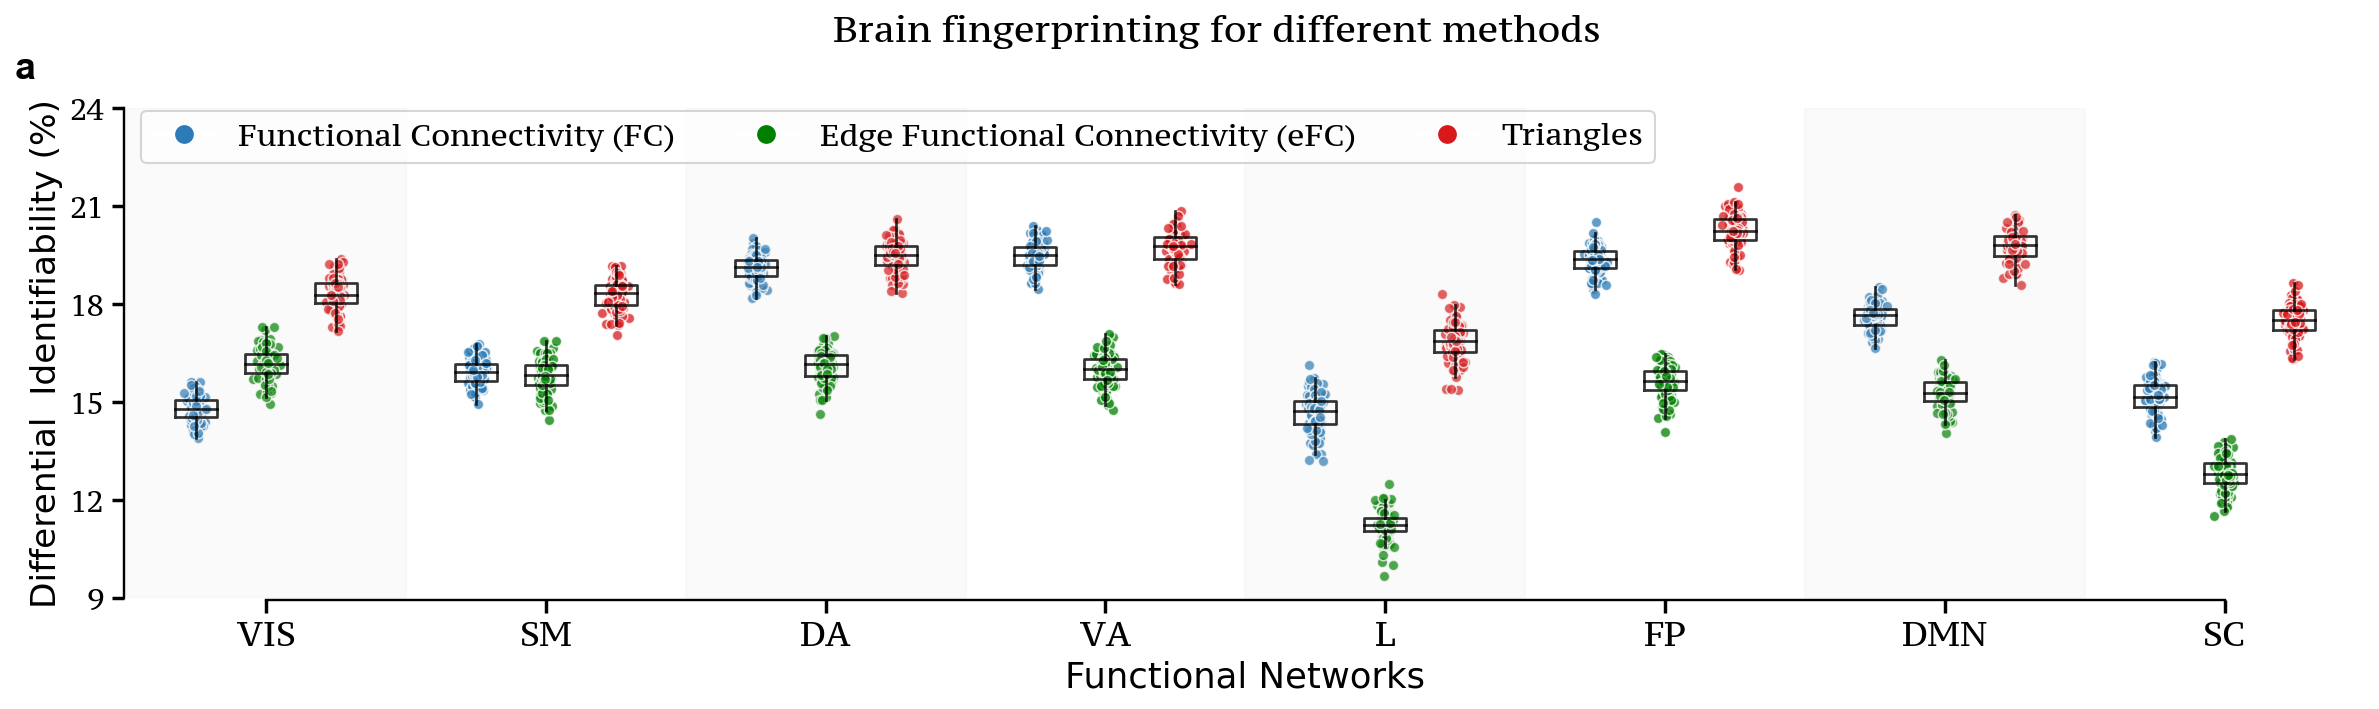

In [5]:
data_TRIANGLE = [list(np.array(results_all_fingerprinting_bootstrap_triangles[key])[:,0,0]) for key in ['VIS','SM','DA','VA','L','FP','DMN','SC']]
data_EDGE = [list(np.array(results_all_fingerprinting_bootstrap_eFC[key])[:,0,0]) for key in ['VIS','SM','DA','VA','L','FP','DMN','SC']]
data_NODE = [list(np.array(results_all_fingerprinting_bootstrap_FC[key])[:,0,0]) for key in ['VIS','SM','DA','VA','L','FP','DMN','SC']]

ticks = ['VIS', 'SM', 'DA', 'VA', 'L', 'FP','DMN','SC']

def set_box_color(bp, color, lw, alpha_box):
    plt.setp(bp['boxes'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['whiskers'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['caps'], color=color,linewidth=lw,alpha=alpha_box)
    plt.setp(bp['medians'], color=color,linewidth=lw,alpha=alpha_box)

fig = plt.figure(figsize=(15.6,4),dpi=150)
ax = plt.subplot(111)
plot_adjustments(ax=ax,ticks_width=1.15,axis_width=1.15,labelsizereg=14)
# plt.ylim(3,24)
plt.ylim(9,24)
plt.yticks(np.arange(9,24+0.1,3))
plt.xlim(-1,15)
sns.despine(fig,offset=1,trim=True)
width_box=0.3

# sns.stripplot(data=long_df,x='Network',y='Value',hue='Type',jitter=0.05,alpha=0.5)
bpl_nod= plt.boxplot(data_NODE, positions=np.array(np.arange(len(data_NODE)))*2.0-0.5, sym='',
                     widths=width_box, showfliers=False,showcaps=False)
bpl_edg = plt.boxplot(data_EDGE, positions=np.array(np.arange(len(data_EDGE)))*2.0, sym='',
                      widths=width_box, showfliers=False,showcaps=False)
bpl_tri = plt.boxplot(data_TRIANGLE, positions=np.array(np.arange(len(data_TRIANGLE)))*2.0+0.5, sym='',
                      widths=width_box, showfliers=False,showcaps=False)

alpha_val=0.75
size_marker=25
lw_box=1.3
for l in range(8):
    #Triangle points
    plt.scatter(np.random.normal(2*l-0.5,0.03,size=len(data_NODE[l])),data_NODE[l],
            s=size_marker,color='#2C7BB6',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=0.75)

    plt.scatter(np.random.normal(2*l,0.03,size=len(data_EDGE[l])),data_EDGE[l],
                s=size_marker,color='green',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=0.75)

    plt.scatter(np.random.normal(2*l+0.5,0.03,size=len(data_TRIANGLE[l])),data_TRIANGLE[l],
                s=size_marker,color='#D7191C',alpha=alpha_val,zorder=-100,marker='o', edgecolor='white',linewidth=0.75)
    


alpha_box=0.8
set_box_color(bpl_tri, 'black',lw_box,alpha_box) # colors are from http://colorbrewer2.org/
set_box_color(bpl_edg, 'black',lw_box,alpha_box)
set_box_color(bpl_nod, 'black',lw_box,alpha_box)

line1 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="#2C7BB6")
line2 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="green")
line3 = Line2D([], [], color="white", marker='o', markersize=10, markerfacecolor="#D7191C")
plt.legend((line1,line2, line3), ('Functional Connectivity (FC)','Edge Functional Connectivity (eFC)', 'Triangles'),
           bbox_to_anchor=(0,1.025),
           numpoints=1, fontsize=14.5,ncol=3,loc='upper left')



plt.xticks(np.arange(0, len(ticks) * 2, 2), ticks,fontsize=16)
# plt.xlim(-2, len(ticks)*2)
# plt.ylim(0, 8)
plt.tight_layout()
plt.suptitle('Brain fingerprinting for different methods',y=1.1,fontsize=17.5)
plt.xlabel('Functional Networks',fontsize=17)
plt.ylabel('Differential  Identifiability (%)',fontsize=16.5,labelpad=3)
ax.axvspan(-1,1, alpha=0.1, color='lightgray')

ax.axvspan(3,5, alpha=0.1, color='lightgray')
ax.axvspan(7,9, alpha=0.1, color='lightgray')
ax.axvspan(11,13, alpha=0.1, color='lightgray')
font = {'family': 'sans-serif',
        'fontname':'Arial',
        'color':  'black',
        'weight': 'bold',
        'size': 18,
        }


plt.text(x=-0.045,y=1.08,s="a", horizontalalignment='center',
     verticalalignment='center',clip_on=False,weight='bold',fontdict=font,
     transform = ax.transAxes)

bars = np.arange(-0.5,13,0.5)
heights = [21]*len(bars)

# barplot_annotate_brackets(0,1,.01, bars, heights,barh=0.01)
# plt.savefig(path_data_saved + 'Fig4_Brain_fingerprinting_top_panel_final.svg')

## Second part of the plot

In [6]:
list_yeo_networks={'VIS':0,'SM':1,'DA':2,'VA':3,'L':4,'FP':5,'DMN':6,'SC':7}
brain_map_triangles={i:[] for i in ['VIS','SM','DA','VA','L','FP','DMN','SC']}
##Loading the yeoROIS
yeoROIs=np.array([i[0]-1 for i in loadmat('yeo_RS7_Schaefer100S.mat')['yeoROIs']])
map_idx_triangles={val:idx for idx,val in enumerate(combinations(np.arange(N_nodes),3))}

brain_map_triangles_Yeo_NET={i:[] for i in ['VIS','SM','DA','VA','L','FP','DMN','SC']}


for NET_selected in tqdm_notebook(['VIS','SM','DA','VA','L','FP','DMN','SC']):
    for flag_num in [1]:
        net_sel=list_yeo_networks[NET_selected] ## This is current Yeo network
        nodes_Yeonetwork=frozenset(np.where(yeoROIs==net_sel)[0])
        list_Yeonetwork_indexes_triangles=[]
        list_Yeonetwork_indexes_edges=[]
        #find the indices of triangles with at least one node in the current Yeo network
        indices_nodes={i:[] for i in range(N_nodes)}
        for idx,l in enumerate(combinations(np.arange(N_nodes),3)):
            i,j,k=l
            flag=[i in nodes_Yeonetwork,j in nodes_Yeonetwork, k in nodes_Yeonetwork]
            if sum(flag)>=flag_num:
                list_Yeonetwork_indexes_triangles.append(idx)
                indices_nodes[i].append(idx)
                indices_nodes[j].append(idx)
                indices_nodes[k].append(idx)
        data_network=[]
        for subjID in list_subjs:
            for j in [1,2]:
                current_data=np.nan_to_num(np.array([np.mean(data_triangles_REST[(subjID,j)][indices_nodes[i]]) for i in range(N_nodes)]))
                data_network.append(current_data)
        data_network=np.array(data_network)
        current_net=np.nan_to_num(np.std(data_network,axis=0)/np.mean(data_network,axis=0))
        brain_map_triangles[NET_selected].append(current_net)
#     brain_map_triangles[NET_selected]=np.corrcoef(np.array(brain_map_triangles[NET_selected]))
    ##Remap the brain maps at 7 yeo networks 
    for kk in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
        current_nodes_kk=np.array(list(frozenset(np.where(yeoROIs==list_yeo_networks[kk])[0])))
        brain_map_triangles_Yeo_NET[NET_selected].append(np.mean(brain_map_triangles[NET_selected][0][current_nodes_kk]))


  0%|          | 0/8 [00:00<?, ?it/s]

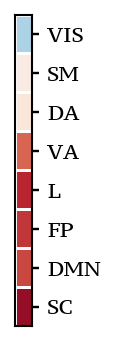

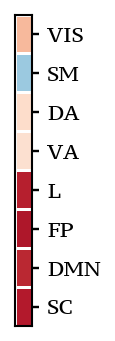

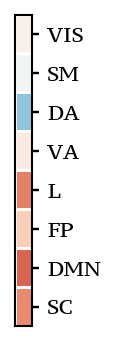

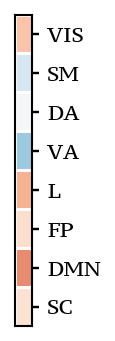

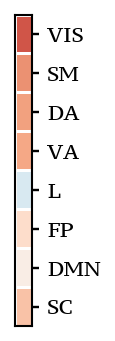

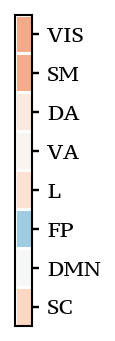

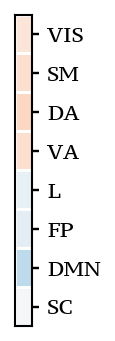

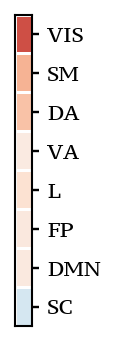

In [7]:
for net in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
    fig=plt.figure(dpi=150,figsize=(0.15,2.75))
    ax=plt.subplot(111)
    res=sns.heatmap(np.transpose([brain_map_triangles_Yeo_NET[net]]),cmap='RdBu_r',vmin=0,vmax=0.4,cbar=False,linewidths = 1.25,
                  linecolor = "white")
    for _, spine in res.spines.items():
        spine.set_visible(True)
        spine.set_linewidth(1)
    ax.set_xticks([]);
    ax.yaxis.tick_right()
    ax.set_yticklabels(['VIS','SM','DA','VA','L','FP','DMN','SC'],fontsize=10,rotation=0);
    ax.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
#     plt.savefig('fingerprinting_YeoMap_CoefficientVariation_network_%s.svg'%net,transparent=True)

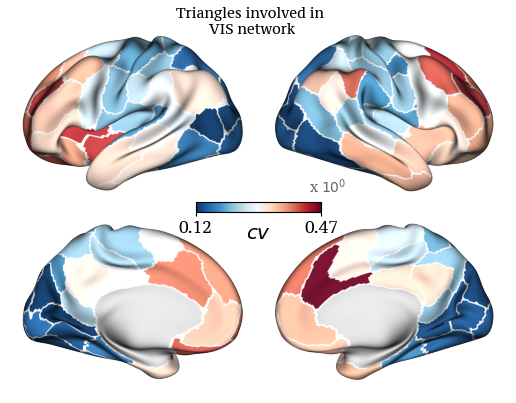

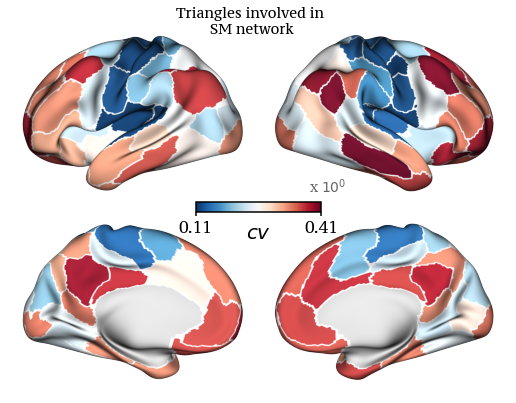

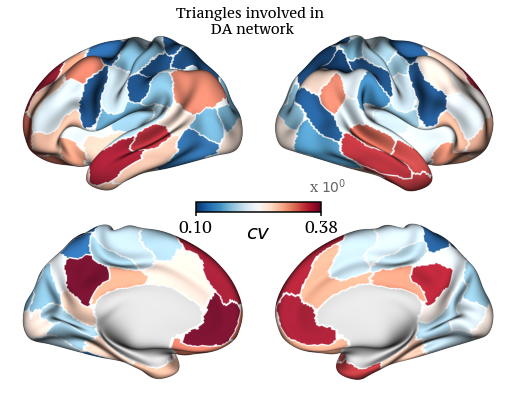

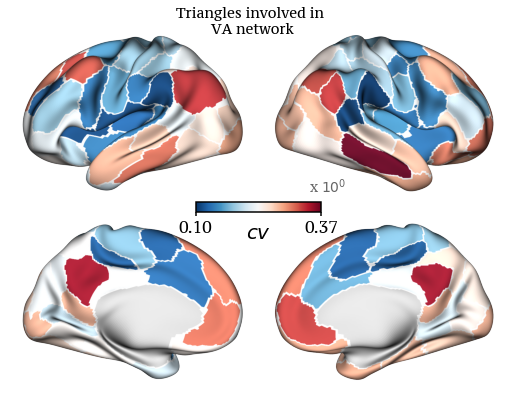

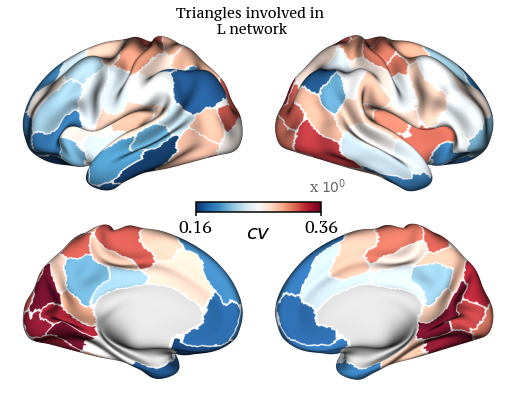

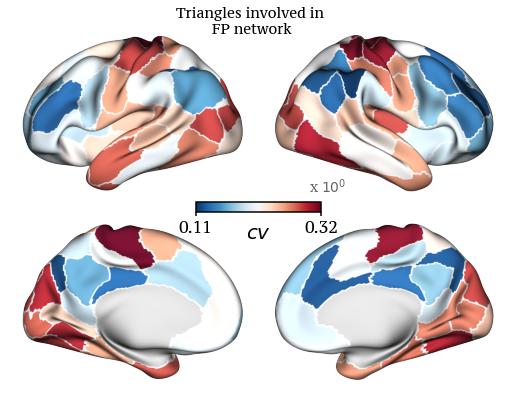

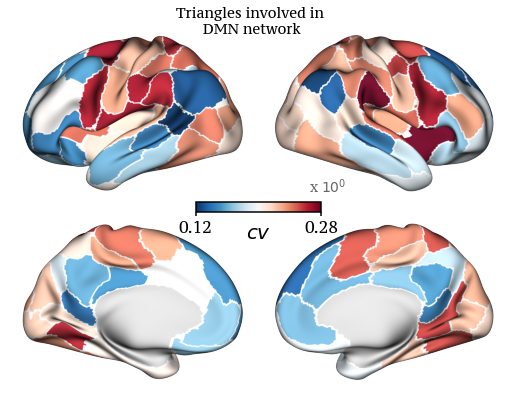

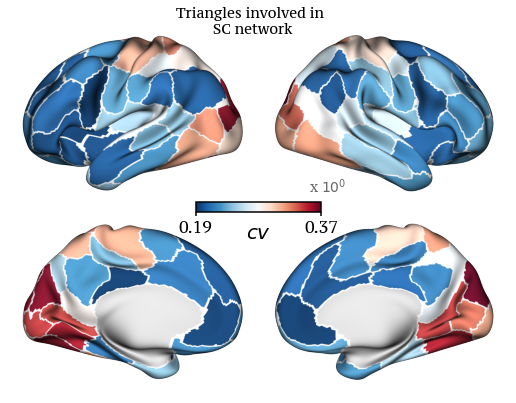

In [8]:
### All networks:
for NET_selected in ['VIS','SM','DA','VA','L','FP','DMN','SC']:
    net_sel=list_yeo_networks[NET_selected] ## This is current Yeo network
    nodes_Yeonetwork=frozenset(np.where(yeoROIs==net_sel)[0])
    list_Yeonetwork_indexes_triangles=[]
    list_Yeonetwork_indexes_edges=[]
    #find the indices of triangles with at least one node in the current Yeo network
    indices_nodes={i:[] for i in range(N_nodes)}
    for idx,l in enumerate(combinations(np.arange(N_nodes),3)):
        i,j,k=l
        flag=[i in nodes_Yeonetwork,j in nodes_Yeonetwork, k in nodes_Yeonetwork]
        if sum(flag)>=1:
            list_Yeonetwork_indexes_triangles.append(idx)
            indices_nodes[i].append(idx)
            indices_nodes[j].append(idx)
            indices_nodes[k].append(idx)
            
    data_network=[]
    for subjID in list_subjs:
        for j in [1,2]:
            current_data=np.nan_to_num(np.array([np.mean(data_triangles_REST[(subjID,j)][indices_nodes[i]]) for i in range(100)]))
            data_network.append(current_data)
    data_network=np.array(data_network)
    normal_view(np.nan_to_num(np.std(data_network,axis=0)/np.mean(data_network,axis=0)),edges=True,graymap_rev=False,
            alpha_graymap=0.99,center_cbar=True,xlabel='$cv$');
    plt.suptitle('Triangles involved in\n %s network'% NET_selected,y=0.55,fontsize=14,)
#     plt.savefig('fingerprinting_brainmap_CoefficientVariation_network_%s.svg'%NET_selected)